In [88]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [89]:
# Create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [90]:
# Add the latitude and longitudes to a list
coordinates=list(lat_lngs)

In [91]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

89.00872520760112 -127.96268348586261
-46.56386789089634 173.66415230349992
28.823909467208296 59.978234257757634
-37.780403822673186 -173.27611884520962
-3.7308734838552766 -40.965652467898735
-79.0735308081955 4.0336679540131115
-80.20680159839725 -49.31424852561938
47.52597736208074 124.73756104790448
16.42686244849314 42.95240813556205
-70.31395352250095 149.46377296069113
-52.49026346493865 -50.84188790296878
-73.60195008930917 -12.570724076723508
8.050351675540782 92.3162083445053
-54.62422911792265 -151.54269797198094
53.22028413335812 -56.691652934225345
-40.500483265397555 -70.85213391951022
70.11995230976896 -8.03216056640747
-85.25857634029774 -114.96504877341711
-35.101251458543985 51.606195397299246
9.637717082116936 -158.71178464615562
-66.81964761419019 90.19962218230995
21.54248915121461 -41.979128567708074
-74.02701719506817 -164.50586957456173
-20.05716576242027 -74.28925350085758
-61.213384884916216 -166.01289626016097
-17.87410721610354 -104.0104911612086
-64.370689

34.455779635564454 -63.09395750138161
67.91321681789171 141.20113982647456
-18.873425925291414 -125.78137575383101
72.22986183302717 54.957979619551594
37.01170519122839 -39.751806058871324
-18.126432802463384 -73.60087409638955
63.91496992899036 89.13303688601218
-55.505746885121546 94.88053712591636
86.93171756951563 -2.0502516682932423
12.230345568007152 90.03450740728755
-4.523168907662864 103.36688411120929
79.13948930961814 -129.1848029539605
6.5267209094295 -24.28903136382334
17.305267531010585 -167.6547149044992
61.72885087582003 -49.339243297792194
30.430800418195574 -102.16807128425931
30.509106170534395 -170.51754044514865
20.15284454161285 161.71403147658566
12.558501002422389 -124.68055014352848
-59.29257631187653 -18.665531985856063
20.05822380983635 -14.559228401052081
-20.204023862781796 62.004835854551345
-67.7972529623603 -144.88960070487605
-46.69372199022536 -135.1356255634633
2.449001346778033 170.15661053924123
14.00192524973582 68.63836125245257
-19.9178359456649

16.412549416903516 167.39243448586063
-6.641389179376631 141.52377177317294
-84.78885552995838 -88.19871723912999
48.77961097659278 111.16840886355811
-45.95735601108301 70.88352989258516
-6.72751849713066 177.82256322174476
-84.38854898868269 123.93154030879276
-46.71510902205411 27.13779869756496
0.41753546531391805 -61.028890291707796
74.3574069703512 -1.5705309224946689
-5.397553344305166 -5.655671540378933
66.88762828473537 58.38080106266776
36.92577184025397 47.793372022275975
20.649996959487183 -40.918693941455786
30.754974123921926 130.65360591659805
71.35271717717345 44.173592584683576
-1.443052902353358 -175.3655646424461
59.319028716969115 170.61395351915314
-52.14932990059508 98.35786214192728
-31.181284148211695 -113.55151853381989
-77.60611559409251 37.90974144230387
69.02791959896189 -85.49168284940758
33.34277761179479 178.2640208285448
82.50335713441658 71.82699503920622
37.22866913801863 -170.79523773339022
76.3909265356047 -166.42342599825355
-62.330234239694626 -15.

-77.22367602705921 107.62192379796647
-1.5943970471549704 -2.2954660734527295
44.80559308829268 -80.74471381422744
-30.199485942116283 129.82765416428612
-0.5192568393500352 -75.21004739655443
-45.19071468682704 52.18216420375353
46.91838897887186 38.22506954705989
60.57416693660426 99.16103710569138
46.59878311122432 -81.65659832184093
37.422040165184555 -1.0441108169493134
-57.80641037327996 170.07885201172286
-26.988634422358473 -82.87295413913941
57.01479739829881 -172.73885008935537
-26.788822294791473 141.6728652754025
-20.612313911000868 -81.90591556611228
22.251091878790177 40.94540581847184
-61.74531339133733 20.063309233132685
42.3575825219732 -157.13316910145352
77.74752208475584 32.434102462260284
65.10917788051228 81.43546174646497
41.610646035830854 -66.55328803471136
-69.44179190599158 -69.52703479421085
68.13129440340305 -65.6959173102755
31.807787106131315 -56.94914636326784
-2.4181958841966207 -80.75709006855294
63.920876446136106 -12.116786176515603
82.35858521620895

13.85205547246035 -140.53635383232069
-1.262043350203939 -164.42225354603224
-19.76879569848991 -83.06870024566336
16.455174972466665 84.51722844159167
-2.6229180424867877 102.97527202885817
84.9530221184909 174.83216938193146
3.5823843986407695 134.3444744062922
-61.72178063330527 -103.28138653018061
85.72388623574824 -168.24850196262602
53.04107356194794 75.93904094687053
56.973625636559206 -24.7074100723016
72.67944561456949 -78.30906614229339
-25.94535494990619 -28.742022019205905
-31.61413890405889 103.34244786564494
-33.275289988189506 21.282152258496097
67.21584801215522 119.15891340784106
43.38103076743218 85.38474101360663
-72.13432853894457 -156.93177920006752
-64.34874329782866 -20.799321439617046
-11.005153633670204 91.86343906102832
-20.17236729711584 -16.560219271073606
59.68147765036707 172.61614259252707
42.733093951449575 78.47910551338481
46.93135265994695 -28.944788522837968
21.9775254733333 -97.92587196713822
42.713673957058774 114.19302095940083
22.784911044845984 

In [92]:
from citipy import citipy
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities lsit
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

606

In [93]:
# Import the requests library
import requests

#Import the API key
from config import weather_api_key

# Starting URL  for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1358d88a5cf15b27a93eb9d270b17c95


In [94]:
# Import the time Library and the datetime module from the datetie library
import time
from datetime import datetime

In [95]:

# Create an empty list to hold the weather data
city_data=[]

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("--------------------------")

# Create counters
record_count=1
set_count=1

# loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url= url + "&q="+ city
    #.replace("","+")
    
    # Log the URL, record, and set numers and the city
    print(f"Processing Record{record_count}of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------
Processing Record1of Set1 | tuktoyaktuk
Processing Record2of Set1 | southbridge
Processing Record3of Set1 | khash
Processing Record4of Set1 | vaini
Processing Record5of Set1 | tiangua
Processing Record6of Set1 | hermanus
Processing Record7of Set1 | ushuaia
Processing Record8of Set1 | fuyu
Processing Record9of Set1 | jizan
Processing Record10of Set1 | hobart
Processing Record11of Set1 | mar del plata
Processing Record12of Set1 | cape town
Processing Record13of Set1 | port blair
Processing Record14of Set1 | mataura
Processing Record15of Set1 | saint anthony
Processing Record16of Set1 | san carlos de bariloche
Processing Record17of Set1 | klaksvik
Processing Record18of Set1 | punta arenas
Processing Record19of Set1 | taolanaro
City not found. Skipping...
Processing Record20of Set1 | hilo
Processing Record21of Set1 | busselton
Processing Record22of Set1 | ponta do sol
Processing Record23of Set1 | camana
Processing Record24of Set1 | avarua

Processing Record6of Set5 | ambon
Processing Record7of Set5 | san ramon
Processing Record8of Set5 | port hardy
Processing Record9of Set5 | tateyama
Processing Record10of Set5 | cacapava do sul
Processing Record11of Set5 | esmeraldas
Processing Record12of Set5 | salalah
Processing Record13of Set5 | krugersdorp
Processing Record14of Set5 | assomada
Processing Record15of Set5 | grand-santi
Processing Record16of Set5 | nadadores
Processing Record17of Set5 | barillas
Processing Record18of Set5 | sarishabari
Processing Record19of Set5 | pokrovka
Processing Record20of Set5 | pitiquito
Processing Record21of Set5 | mecca
Processing Record22of Set5 | beaver dam
Processing Record23of Set5 | calabozo
Processing Record24of Set5 | saint george
Processing Record25of Set5 | aklavik
Processing Record26of Set5 | longyearbyen
Processing Record27of Set5 | henties bay
Processing Record28of Set5 | nanakuli
Processing Record29of Set5 | krasnoarmeysk
Processing Record30of Set5 | nanortalik
Processing Record31

Processing Record8of Set9 | oistins
Processing Record9of Set9 | natal
Processing Record10of Set9 | dymer
Processing Record11of Set9 | vostok
Processing Record12of Set9 | gemunden
Processing Record13of Set9 | emerald
Processing Record14of Set9 | cusuna
Processing Record15of Set9 | kiunga
Processing Record16of Set9 | kyra
Processing Record17of Set9 | barcelos
Processing Record18of Set9 | usinsk
Processing Record19of Set9 | zanjan
Processing Record20of Set9 | kaseda
Processing Record21of Set9 | kamenka
Processing Record22of Set9 | tilichiki
Processing Record23of Set9 | wyndham
Processing Record24of Set9 | mehamn
Processing Record25of Set9 | balad
Processing Record26of Set9 | liberal
Processing Record27of Set9 | markova
Processing Record28of Set9 | mount gambier
Processing Record29of Set9 | bar harbor
Processing Record30of Set9 | mananara
Processing Record31of Set9 | halalo
City not found. Skipping...
Processing Record32of Set9 | comarapa
Processing Record33of Set9 | moron
Processing Recor

In [96]:
len(city_data)

557

In [97]:
# Conver the array of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,26.60,80,20,5.75,CA,2022-10-15 19:24:37
1,Southbridge,42.0751,-72.0334,71.42,47,0,7.00,US,2022-10-15 19:26:13
2,Khash,28.2211,61.2158,65.03,13,0,3.74,IR,2022-10-15 19:26:14
3,Vaini,-21.2000,-175.2000,71.76,88,75,1.14,TO,2022-10-15 19:26:14
4,Tiangua,-3.7322,-40.9917,90.70,24,53,7.54,BR,2022-10-15 19:26:15


In [98]:
city_data_df2=city_data_df.loc[:,["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
#city_data_df2=pd.DataFrame(city_data_df.loc[:,["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]])
city_data_df2.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-10-15 19:24:37,69.4541,-133.0374,26.60,80,20,5.75
1,Southbridge,US,2022-10-15 19:26:13,42.0751,-72.0334,71.42,47,0,7.00
2,Khash,IR,2022-10-15 19:26:14,28.2211,61.2158,65.03,13,0,3.74
3,Vaini,TO,2022-10-15 19:26:14,-21.2000,-175.2000,71.76,88,75,1.14
4,Tiangua,BR,2022-10-15 19:26:15,-3.7322,-40.9917,90.70,24,53,7.54


In [122]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")
# Fixing so that output for city_data_df2 includes "City_ID"
city_data_df2=pd.read_csv(output_data_file)

In [124]:
# Output for adding city data after converting 
city_data_df2

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-10-15 19:24:37,69.4541,-133.0374,26.60,80,20,5.75
1,Southbridge,US,2022-10-15 19:26:13,42.0751,-72.0334,71.42,47,0,7.00
2,Khash,IR,2022-10-15 19:26:14,28.2211,61.2158,65.03,13,0,3.74
3,Vaini,TO,2022-10-15 19:26:14,-21.2000,-175.2000,71.76,88,75,1.14
4,Tiangua,BR,2022-10-15 19:26:15,-3.7322,-40.9917,90.70,24,53,7.54
...,...,...,...,...,...,...,...,...,...
552,Kailua,US,2022-10-15 19:37:14,21.4022,-157.7394,82.44,70,94,11.41
553,Broadstairs,GB,2022-10-15 19:42:09,51.3591,1.4394,56.77,79,99,5.01
554,Elizabeth City,US,2022-10-15 19:40:32,36.2946,-76.2511,78.82,41,0,10.36
555,Maraba,BR,2022-10-15 19:42:10,-5.3686,-49.1178,95.18,43,20,3.44


In [100]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df2["Lat"]
max_temps=city_data_df2["Max Temp"]
humidity=city_data_df2["Humidity"]
cloudiness=city_data_df2["Cloudiness"]
wind_speed=city_data_df2["Wind Speed"]

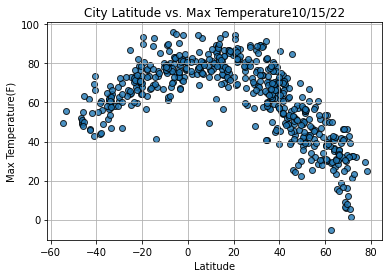

In [101]:
# Import time module
import time

# Build the scatter plot for latitudde vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

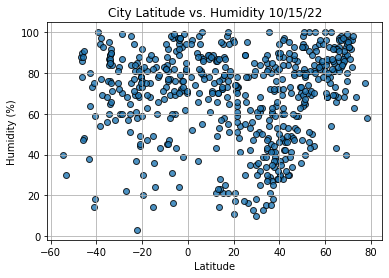

In [102]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

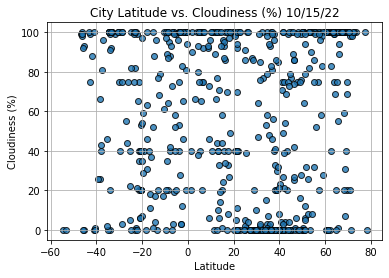

In [103]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

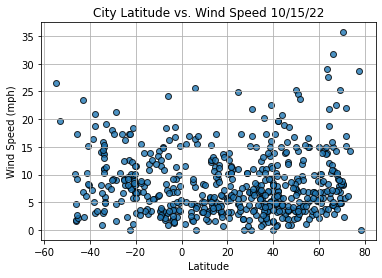

In [104]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [119]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfomr linear regression on te weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err)= linregress(x_values, y_values)
    
    # Calculate the regressionline "y values" from the slope and intercept
    regress_values=x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate te text for the line equation
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [106]:
index13=city_data_df2.loc[13]
index13


City                      Mataura
Country                        NZ
Date          2022-10-15 19:21:54
Lat                      -46.1927
Lng                      168.8643
Max Temp                    49.06
Humidity                       86
Cloudiness                    100
Wind Speed                   1.63
Name: 13, dtype: object

In [126]:
city_data_df2

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-10-15 19:24:37,69.4541,-133.0374,26.60,80,20,5.75
1,Southbridge,US,2022-10-15 19:26:13,42.0751,-72.0334,71.42,47,0,7.00
2,Khash,IR,2022-10-15 19:26:14,28.2211,61.2158,65.03,13,0,3.74
3,Vaini,TO,2022-10-15 19:26:14,-21.2000,-175.2000,71.76,88,75,1.14
4,Tiangua,BR,2022-10-15 19:26:15,-3.7322,-40.9917,90.70,24,53,7.54
...,...,...,...,...,...,...,...,...,...
552,Kailua,US,2022-10-15 19:37:14,21.4022,-157.7394,82.44,70,94,11.41
553,Broadstairs,GB,2022-10-15 19:42:09,51.3591,1.4394,56.77,79,99,5.01
554,Elizabeth City,US,2022-10-15 19:40:32,36.2946,-76.2511,78.82,41,0,10.36
555,Maraba,BR,2022-10-15 19:42:10,-5.3686,-49.1178,95.18,43,20,3.44


In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

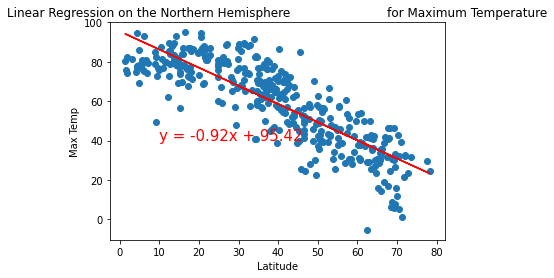

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

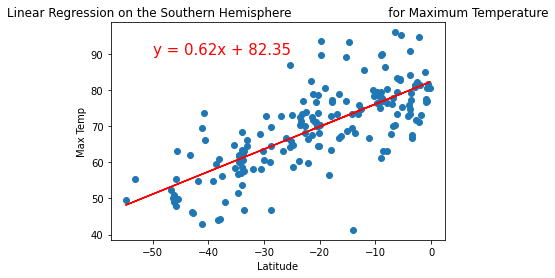

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

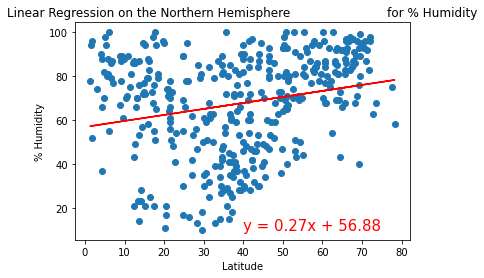

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

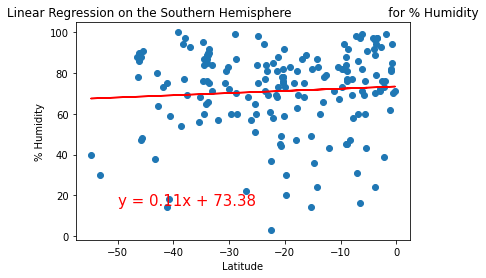

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

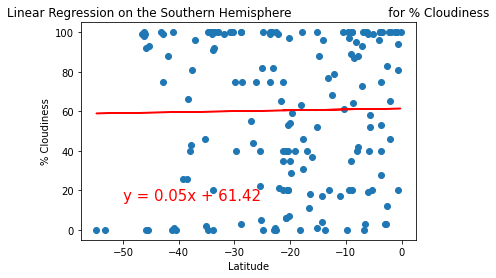

In [135]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

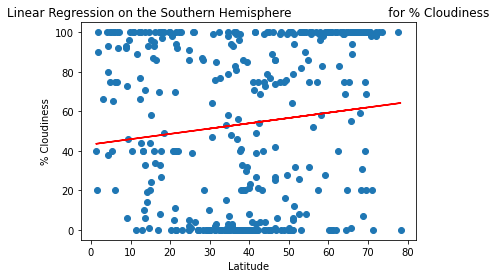

In [137]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

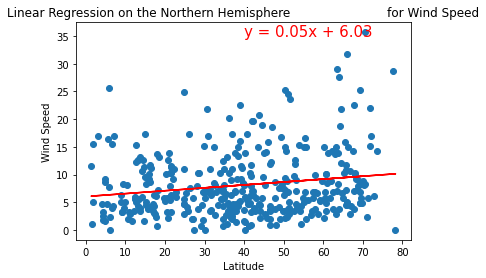

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

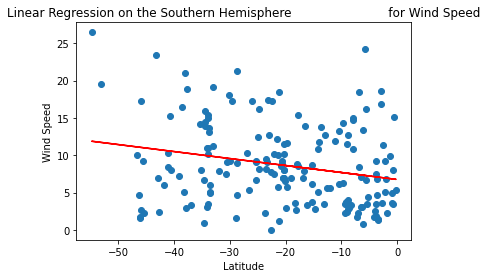

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))